# Environment lighting using emotion detection
## `Problem statement`:  
"Necessity is the mother of invention" - Plato  
This is strictly for people having rgb lighting in the house or on their set up where they work everyday.  
We are not always in the same emotional state as we are everyday,  
sometimes we become really happy,  
sometimes really sad,  
sometimes it's time to move on, etc  
The point is that what if we have a device which can identify our songs genre and simulate our RGB lighting in our house according to it.  
### How will that help?  
hmm, let me ask you what help those hours of scrolling on instagram reels
does in our life......  
that's a thing you just wanna do right....  
### How will we achieve this?
We can use recurring neural networks to create a NLP Model which gradually detects emotion state,i.e,The song genre....  
Or we can use use **Bert** which has already been trained on the Millions of Lines of statement to use that model for **Transfer Learning**
## Data  
It was a big problem for us to find an optimal data for such problem. But we tried to find the suitable data for the same that is  
[emotion_detection_from_text](https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text): this will be used for text based classification of the same  
Also, we will use `speechrecognition` library in `python` for the speech recognition which will save computation as well as time to train also find such model
### Libraries


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

## MultiClass classification by using SOTA BERT model and then fine tuning on Tensorflow
1. ### We will use tokenizer
2. ### We will convert our data in the form of BERT
3. ### We will see how to use pretrained BERT architecture
4. ### We will then finetune the bert model
5. ### Model evaluation


In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

In [ ]:
# importing the dataset
df_train = pd.read_csv('/content/drive/MyDrive/Emotion/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/Emotion/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('/content/drive/MyDrive/Emotion/val.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

In [ ]:
df_full = pd.concat([df_train,df_test,df_val], axis = 0)
df_full

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


#### here we are doing some text preprocessing



In [ ]:
!pip install text_hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.18 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.9.1 which is incompatible.


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.4 MB/s eta 0:00:00


In [ ]:

import text_hammer as th

In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    # df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    # df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 1.02 ms, sys: 0 ns, total: 1.02 ms
Wall time: 1.57 ms


In [ ]:
df_cleaned = text_preprocessing(df_full,'Input')

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
df_cleaned = df_cleaned.copy()

In [ ]:
df_cleaned.to_csv('/content/drive/MyDrive/Emotion/DataCleaned.csv')

In [ ]:
# run using gpu now

In [ ]:
df_cleaned = pd.read_csv('/content/drive/MyDrive/Emotion/DataCleaned.csv')

In [ ]:
df_cleaned['num_words'] = df_cleaned.Input.apply(lambda x:len(x.split()))

In [ ]:
# changing the data type to the category to encode into codes
df_cleaned['Sentiment'] = df_cleaned.Sentiment.astype('category')


In [ ]:
df_cleaned.Sentiment

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
19995    sadness
19996        joy
19997        joy
19998        joy
19999        joy
Name: Sentiment, Length: 20000, dtype: category
Categories (6, object): ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [ ]:
df_cleaned.Sentiment.cat.codes

0        4
1        4
2        0
3        3
4        0
        ..
19995    4
19996    2
19997    2
19998    2
19999    2
Length: 20000, dtype: int8

In [ ]:
encoded_dict  = {'anger':0,'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5}

In [ ]:
df_cleaned['Sentiment']  =  df_cleaned.Sentiment.cat.codes
df_cleaned.Sentiment

0        4
1        4
2        0
3        3
4        0
        ..
19995    4
19996    2
19997    2
19998    2
19999    2
Name: Sentiment, Length: 20000, dtype: int8

In [ ]:
df_cleaned.num_words.max()

66

In [ ]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(df_cleaned, test_size = 0.3, random_state = 42, stratify = df_cleaned.Sentiment)

In [ ]:
data_train.shape

(14000, 4)

In [ ]:
data_test.shape

(6000, 4)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
to_categorical(data_train.Sentiment)

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

### so far we have cleaned our text data now we need to encode our output in some labels ,
here we have two method to encode

## Now lets load the model

In [ ]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
tokenizer.save_pretrained('bert-tokenizer')
bert.save_pretrained('bert-model')
# for saving model locally and we can load it later on

In [ ]:
import shutil
shutil.make_archive('bert-tokenizer', 'zip', 'bert-tokenizer')

'/content/bert-tokenizer.zip'

In [ ]:
shutil.make_archive('bert-model','zip','bert-model')

'/content/bert-model.zip'

In [ ]:
### we can use distilbert its lighter cheaper and similar performance

from transformers import BertTokenizer, TFBertModel, BertConfig,TFDistilBertModel,DistilBertTokenizer,DistilBertConfig
dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
# Tokenize the input (takes some time)
# here tokenizer using from bert-base-cased
x_train = tokenizer(
    text=data_train.Input.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


x_test = tokenizer(
    text=data_test.Input.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)



In [ ]:
x_test['input_ids']

<tf.Tensor: shape=(6000, 70), dtype=int32, numpy=
array([[ 101,  178, 1474, ...,    0,    0,    0],
       [ 101,  178, 1631, ...,    0,    0,    0],
       [ 101,  178, 2045, ...,    0,    0,    0],
       ...,
       [ 101,  178, 1138, ...,    0,    0,    0],
       [ 101,  178, 1180, ...,    0,    0,    0],
       [ 101, 5178, 5427, ...,    0,    0,    0]], dtype=int32)>

### loading some libraries

In [ ]:
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
# from tensorflow.keras.losses import CategoricalCrossentropy
# from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
max_len = 70
import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense

input_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]


embeddings = bert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 means pooler_output)
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = tf.keras.layers.Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = tf.keras.layers.Dense(32,activation = 'relu')(out)

y = tf.keras.layers.Dense(6,activation = 'sigmoid')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True
# for training bert our lr must be so small

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website
    epsilon=1e-08,
    weight_decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True)
metric = tf.keras.metrics.CategoricalAccuracy('balanced_accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = metric)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 70,                                            

In [ ]:

tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


#### model fitting and then evaluation

In [ ]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = to_categorical(data_train.Sentiment),
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, to_categorical(data_test.Sentiment)
    ),
  epochs=1,
    batch_size=36
)

  1/389 [..............................] - ETA: 17:05 - loss: 1.9976 - balanced_accuracy: 0.1389

  2/389 [..............................] - ETA: 8:30 - loss: 1.9292 - balanced_accuracy: 0.1806 

  3/389 [..............................] - ETA: 8:23 - loss: 1.8646 - balanced_accuracy: 0.2685

  4/389 [..............................] - ETA: 8:19 - loss: 1.8535 - balanced_accuracy: 0.2639

  5/389 [..............................] - ETA: 8:19 - loss: 1.8188 - balanced_accuracy: 0.2778

  6/389 [..............................] - ETA: 8:20 - loss: 1.7858 - balanced_accuracy: 0.2870

  7/389 [..............................] - ETA: 8:19 - loss: 1.7386 - balanced_accuracy: 0.3214

  8/389 [..............................] - ETA: 8:19 - loss: 1.7117 - balanced_accuracy: 0.3368

  9/389 [..............................] - ETA: 8:31 - loss: 1.7139 - balanced_accuracy: 0.3395

 10/389 [..............................] - ETA: 8:42 - loss: 1.7025 - balanced_accuracy: 0.3528

 11/389 [..............................] - ETA: 8:59 - loss: 1.6965 - balanced_accuracy: 0.3535

 12/389 [..............................] - ETA: 8:53 - loss: 1.7064 - balanced_accuracy: 0.3472

 13/389 [>.............................] - ETA: 8:48 - loss: 1.6908 - balanced_accuracy: 0.3568

 14/389 [>.............................] - ETA: 8:44 - loss: 1.6974 - balanced_accuracy: 0.3552

 15/389 [>.............................] - ETA: 8:39 - loss: 1.6984 - balanced_accuracy: 0.3481

 16/389 [>.............................] - ETA: 8:37 - loss: 1.6861 - balanced_accuracy: 0.3542

 17/389 [>.............................] - ETA: 8:33 - loss: 1.6752 - balanced_accuracy: 0.3497

 18/389 [>.............................] - ETA: 8:30 - loss: 1.6666 - balanced_accuracy: 0.3519

 19/389 [>.............................] - ETA: 8:31 - loss: 1.6646 - balanced_accuracy: 0.3538

 20/389 [>.............................] - ETA: 8:35 - loss: 1.6575 - balanced_accuracy: 0.3611

 21/389 [>.............................] - ETA: 8:43 - loss: 1.6551 - balanced_accuracy: 0.3664

 22/389 [>.............................] - ETA: 8:40 - loss: 1.6484 - balanced_accuracy: 0.3712

 23/389 [>.............................] - ETA: 8:37 - loss: 1.6425 - balanced_accuracy: 0.3744

 24/389 [>.............................] - ETA: 8:34 - loss: 1.6370 - balanced_accuracy: 0.3785

 25/389 [>.............................] - ETA: 8:31 - loss: 1.6260 - balanced_accuracy: 0.3822

 26/389 [=>............................] - ETA: 8:28 - loss: 1.6171 - balanced_accuracy: 0.3878

 27/389 [=>............................] - ETA: 8:25 - loss: 1.6026 - balanced_accuracy: 0.3940

 28/389 [=>............................] - ETA: 8:22 - loss: 1.5886 - balanced_accuracy: 0.4008

 29/389 [=>............................] - ETA: 8:22 - loss: 1.5739 - balanced_accuracy: 0.4080

 30/389 [=>............................] - ETA: 8:24 - loss: 1.5675 - balanced_accuracy: 0.4093

 31/389 [=>............................] - ETA: 8:28 - loss: 1.5576 - balanced_accuracy: 0.4104

 32/389 [=>............................] - ETA: 8:26 - loss: 1.5441 - balanced_accuracy: 0.4149

 33/389 [=>............................] - ETA: 8:24 - loss: 1.5293 - balanced_accuracy: 0.4217

 34/389 [=>............................] - ETA: 8:21 - loss: 1.5253 - balanced_accuracy: 0.4257

 35/389 [=>............................] - ETA: 8:19 - loss: 1.5059 - balanced_accuracy: 0.4357

 36/389 [=>............................] - ETA: 8:16 - loss: 1.5016 - balanced_accuracy: 0.4383

 37/389 [=>............................] - ETA: 8:19 - loss: 1.4944 - balanced_accuracy: 0.4414

 38/389 [=>............................] - ETA: 8:16 - loss: 1.4888 - balanced_accuracy: 0.4437

 39/389 [==>...........................] - ETA: 8:16 - loss: 1.4788 - balanced_accuracy: 0.4473

 40/389 [==>...........................] - ETA: 8:33 - loss: 1.4671 - balanced_accuracy: 0.4521

 41/389 [==>...........................] - ETA: 8:45 - loss: 1.4599 - balanced_accuracy: 0.4546

 42/389 [==>...........................] - ETA: 8:51 - loss: 1.4558 - balanced_accuracy: 0.4577

 43/389 [==>...........................] - ETA: 8:53 - loss: 1.4482 - balanced_accuracy: 0.4606

 44/389 [==>...........................] - ETA: 8:56 - loss: 1.4425 - balanced_accuracy: 0.4615

 45/389 [==>...........................] - ETA: 9:04 - loss: 1.4407 - balanced_accuracy: 0.4636

 46/389 [==>...........................] - ETA: 9:23 - loss: 1.4307 - balanced_accuracy: 0.4698

 47/389 [==>...........................] - ETA: 9:30 - loss: 1.4229 - balanced_accuracy: 0.4740

 48/389 [==>...........................] - ETA: 9:34 - loss: 1.4211 - balanced_accuracy: 0.4734

 49/389 [==>...........................] - ETA: 9:37 - loss: 1.4131 - balanced_accuracy: 0.4768

 50/389 [==>...........................] - ETA: 9:37 - loss: 1.4042 - balanced_accuracy: 0.4794

 51/389 [==>...........................] - ETA: 9:46 - loss: 1.3985 - balanced_accuracy: 0.4809

 52/389 [===>..........................] - ETA: 10:02 - loss: 1.3894 - balanced_accuracy: 0.4861

 53/389 [===>..........................] - ETA: 9:58 - loss: 1.3832 - balanced_accuracy: 0.4885 

 54/389 [===>..........................] - ETA: 9:53 - loss: 1.3778 - balanced_accuracy: 0.4897

 55/389 [===>..........................] - ETA: 9:49 - loss: 1.3654 - balanced_accuracy: 0.4939

 56/389 [===>..........................] - ETA: 9:44 - loss: 1.3590 - balanced_accuracy: 0.4970

 57/389 [===>..........................] - ETA: 9:40 - loss: 1.3548 - balanced_accuracy: 0.4995

 58/389 [===>..........................] - ETA: 9:36 - loss: 1.3476 - balanced_accuracy: 0.5024

 59/389 [===>..........................] - ETA: 9:33 - loss: 1.3413 - balanced_accuracy: 0.5047

 60/389 [===>..........................] - ETA: 9:31 - loss: 1.3310 - balanced_accuracy: 0.5088

 61/389 [===>..........................] - ETA: 9:30 - loss: 1.3236 - balanced_accuracy: 0.5114

 62/389 [===>..........................] - ETA: 9:26 - loss: 1.3207 - balanced_accuracy: 0.5130

 63/389 [===>..........................] - ETA: 9:23 - loss: 1.3138 - balanced_accuracy: 0.5150

 64/389 [===>..........................] - ETA: 9:23 - loss: 1.3075 - balanced_accuracy: 0.5182

 65/389 [====>.........................] - ETA: 9:22 - loss: 1.2998 - balanced_accuracy: 0.5209

 66/389 [====>.........................] - ETA: 9:22 - loss: 1.2941 - balanced_accuracy: 0.5236

 67/389 [====>.........................] - ETA: 9:25 - loss: 1.2855 - balanced_accuracy: 0.5274

 68/389 [====>.........................] - ETA: 9:23 - loss: 1.2795 - balanced_accuracy: 0.5298

 69/389 [====>.........................] - ETA: 9:21 - loss: 1.2749 - balanced_accuracy: 0.5318

 70/389 [====>.........................] - ETA: 9:17 - loss: 1.2666 - balanced_accuracy: 0.5353

 71/389 [====>.........................] - ETA: 9:14 - loss: 1.2575 - balanced_accuracy: 0.5399

 72/389 [====>.........................] - ETA: 9:10 - loss: 1.2519 - balanced_accuracy: 0.5424

 73/389 [====>.........................] - ETA: 9:06 - loss: 1.2515 - balanced_accuracy: 0.5426

 74/389 [====>.........................] - ETA: 9:03 - loss: 1.2458 - balanced_accuracy: 0.5443

 75/389 [====>.........................] - ETA: 9:00 - loss: 1.2402 - balanced_accuracy: 0.5459

 76/389 [====>.........................] - ETA: 8:56 - loss: 1.2348 - balanced_accuracy: 0.5479

 77/389 [====>.........................] - ETA: 8:54 - loss: 1.2287 - balanced_accuracy: 0.5494

 78/389 [=====>........................] - ETA: 8:53 - loss: 1.2283 - balanced_accuracy: 0.5502

 79/389 [=====>........................] - ETA: 8:51 - loss: 1.2236 - balanced_accuracy: 0.5517

 80/389 [=====>........................] - ETA: 8:48 - loss: 1.2196 - balanced_accuracy: 0.5531

 81/389 [=====>........................] - ETA: 8:45 - loss: 1.2163 - balanced_accuracy: 0.5549

 82/389 [=====>........................] - ETA: 8:42 - loss: 1.2097 - balanced_accuracy: 0.5572

 83/389 [=====>........................] - ETA: 8:39 - loss: 1.2028 - balanced_accuracy: 0.5606

 84/389 [=====>........................] - ETA: 8:36 - loss: 1.1974 - balanced_accuracy: 0.5628

 85/389 [=====>........................] - ETA: 8:33 - loss: 1.1927 - balanced_accuracy: 0.5650

 86/389 [=====>........................] - ETA: 8:30 - loss: 1.1886 - balanced_accuracy: 0.5675

 87/389 [=====>........................] - ETA: 8:28 - loss: 1.1797 - balanced_accuracy: 0.5706

 88/389 [=====>........................] - ETA: 8:26 - loss: 1.1768 - balanced_accuracy: 0.5726

 89/389 [=====>........................] - ETA: 8:25 - loss: 1.1695 - balanced_accuracy: 0.5762

 90/389 [=====>........................] - ETA: 8:22 - loss: 1.1610 - balanced_accuracy: 0.5790

 91/389 [======>.......................] - ETA: 8:19 - loss: 1.1521 - balanced_accuracy: 0.5821

 92/389 [======>.......................] - ETA: 8:18 - loss: 1.1453 - balanced_accuracy: 0.5845

 93/389 [======>.......................] - ETA: 8:18 - loss: 1.1390 - balanced_accuracy: 0.5866

 94/389 [======>.......................] - ETA: 8:15 - loss: 1.1337 - balanced_accuracy: 0.5887

 95/389 [======>.......................] - ETA: 8:12 - loss: 1.1297 - balanced_accuracy: 0.5901

 96/389 [======>.......................] - ETA: 8:14 - loss: 1.1250 - balanced_accuracy: 0.5926

 97/389 [======>.......................] - ETA: 8:19 - loss: 1.1174 - balanced_accuracy: 0.5954

 98/389 [======>.......................] - ETA: 8:20 - loss: 1.1092 - balanced_accuracy: 0.5984

 99/389 [======>.......................] - ETA: 8:21 - loss: 1.1018 - balanced_accuracy: 0.6010

100/389 [======>.......................] - ETA: 8:25 - loss: 1.0944 - balanced_accuracy: 0.6036

101/389 [======>.......................] - ETA: 8:35 - loss: 1.0868 - balanced_accuracy: 0.6067

102/389 [======>.......................] - ETA: 8:35 - loss: 1.0826 - balanced_accuracy: 0.6081

103/389 [======>.......................] - ETA: 8:34 - loss: 1.0768 - balanced_accuracy: 0.6108

104/389 [=======>......................] - ETA: 8:34 - loss: 1.0723 - balanced_accuracy: 0.6122

105/389 [=======>......................] - ETA: 8:36 - loss: 1.0685 - balanced_accuracy: 0.6135

106/389 [=======>......................] - ETA: 8:41 - loss: 1.0641 - balanced_accuracy: 0.6156

107/389 [=======>......................] - ETA: 8:45 - loss: 1.0571 - balanced_accuracy: 0.6184

108/389 [=======>......................] - ETA: 8:44 - loss: 1.0508 - balanced_accuracy: 0.6204

109/389 [=======>......................] - ETA: 8:43 - loss: 1.0457 - balanced_accuracy: 0.6228

110/389 [=======>......................] - ETA: 8:41 - loss: 1.0436 - balanced_accuracy: 0.6237

111/389 [=======>......................] - ETA: 8:40 - loss: 1.0415 - balanced_accuracy: 0.6249

112/389 [=======>......................] - ETA: 8:41 - loss: 1.0374 - balanced_accuracy: 0.6270

113/389 [=======>......................] - ETA: 8:42 - loss: 1.0338 - balanced_accuracy: 0.6288

114/389 [=======>......................] - ETA: 8:40 - loss: 1.0274 - balanced_accuracy: 0.6313

115/389 [=======>......................] - ETA: 8:38 - loss: 1.0212 - balanced_accuracy: 0.6338

116/389 [=======>......................] - ETA: 8:38 - loss: 1.0168 - balanced_accuracy: 0.6363

117/389 [========>.....................] - ETA: 8:35 - loss: 1.0109 - balanced_accuracy: 0.6387

118/389 [========>.....................] - ETA: 8:31 - loss: 1.0050 - balanced_accuracy: 0.6405

119/389 [========>.....................] - ETA: 8:29 - loss: 1.0015 - balanced_accuracy: 0.6419

120/389 [========>.....................] - ETA: 8:27 - loss: 0.9969 - balanced_accuracy: 0.6438

121/389 [========>.....................] - ETA: 8:25 - loss: 0.9921 - balanced_accuracy: 0.6451

122/389 [========>.....................] - ETA: 8:22 - loss: 0.9887 - balanced_accuracy: 0.6469

123/389 [========>.....................] - ETA: 8:18 - loss: 0.9826 - balanced_accuracy: 0.6493

124/389 [========>.....................] - ETA: 8:15 - loss: 0.9771 - balanced_accuracy: 0.6517

125/389 [========>.....................] - ETA: 8:12 - loss: 0.9716 - balanced_accuracy: 0.6536

126/389 [========>.....................] - ETA: 8:09 - loss: 0.9669 - balanced_accuracy: 0.6554

127/389 [========>.....................] - ETA: 8:06 - loss: 0.9641 - balanced_accuracy: 0.6568

128/389 [========>.....................] - ETA: 8:04 - loss: 0.9585 - balanced_accuracy: 0.6586

129/389 [========>.....................] - ETA: 8:01 - loss: 0.9540 - balanced_accuracy: 0.6604

130/389 [=========>....................] - ETA: 7:59 - loss: 0.9489 - balanced_accuracy: 0.6624

131/389 [=========>....................] - ETA: 7:57 - loss: 0.9462 - balanced_accuracy: 0.6626

132/389 [=========>....................] - ETA: 7:54 - loss: 0.9426 - balanced_accuracy: 0.6639

133/389 [=========>....................] - ETA: 7:51 - loss: 0.9376 - balanced_accuracy: 0.6656

134/389 [=========>....................] - ETA: 7:49 - loss: 0.9322 - balanced_accuracy: 0.6675

135/389 [=========>....................] - ETA: 7:46 - loss: 0.9257 - balanced_accuracy: 0.6700

136/389 [=========>....................] - ETA: 7:43 - loss: 0.9205 - balanced_accuracy: 0.6716

137/389 [=========>....................] - ETA: 7:40 - loss: 0.9154 - balanced_accuracy: 0.6732

138/389 [=========>....................] - ETA: 7:38 - loss: 0.9107 - balanced_accuracy: 0.6749

139/389 [=========>....................] - ETA: 7:35 - loss: 0.9093 - balanced_accuracy: 0.6755

140/389 [=========>....................] - ETA: 7:33 - loss: 0.9049 - balanced_accuracy: 0.6772

141/389 [=========>....................] - ETA: 7:31 - loss: 0.9015 - balanced_accuracy: 0.6789

142/389 [=========>....................] - ETA: 7:29 - loss: 0.8969 - balanced_accuracy: 0.6808

143/389 [==========>...................] - ETA: 7:26 - loss: 0.8941 - balanced_accuracy: 0.6820

144/389 [==========>...................] - ETA: 7:23 - loss: 0.8928 - balanced_accuracy: 0.6831

145/389 [==========>...................] - ETA: 7:21 - loss: 0.8889 - balanced_accuracy: 0.6847

146/389 [==========>...................] - ETA: 7:18 - loss: 0.8860 - balanced_accuracy: 0.6855

147/389 [==========>...................] - ETA: 7:15 - loss: 0.8817 - balanced_accuracy: 0.6873

148/389 [==========>...................] - ETA: 7:13 - loss: 0.8795 - balanced_accuracy: 0.6883

149/389 [==========>...................] - ETA: 7:11 - loss: 0.8761 - balanced_accuracy: 0.6894

150/389 [==========>...................] - ETA: 7:09 - loss: 0.8732 - balanced_accuracy: 0.6909

151/389 [==========>...................] - ETA: 7:07 - loss: 0.8717 - balanced_accuracy: 0.6917

152/389 [==========>...................] - ETA: 7:04 - loss: 0.8705 - balanced_accuracy: 0.6921

153/389 [==========>...................] - ETA: 7:02 - loss: 0.8660 - balanced_accuracy: 0.6937

154/389 [==========>...................] - ETA: 6:59 - loss: 0.8635 - balanced_accuracy: 0.6950

155/389 [==========>...................] - ETA: 6:57 - loss: 0.8607 - balanced_accuracy: 0.6962

156/389 [===========>..................] - ETA: 6:54 - loss: 0.8580 - balanced_accuracy: 0.6973

157/389 [===========>..................] - ETA: 6:52 - loss: 0.8542 - balanced_accuracy: 0.6985

158/389 [===========>..................] - ETA: 6:49 - loss: 0.8511 - balanced_accuracy: 0.6995

159/389 [===========>..................] - ETA: 6:47 - loss: 0.8474 - balanced_accuracy: 0.7007

160/389 [===========>..................] - ETA: 6:45 - loss: 0.8441 - balanced_accuracy: 0.7021

161/389 [===========>..................] - ETA: 6:44 - loss: 0.8416 - balanced_accuracy: 0.7032

162/389 [===========>..................] - ETA: 6:42 - loss: 0.8394 - balanced_accuracy: 0.7039

163/389 [===========>..................] - ETA: 6:39 - loss: 0.8371 - balanced_accuracy: 0.7048

164/389 [===========>..................] - ETA: 6:37 - loss: 0.8343 - balanced_accuracy: 0.7061

165/389 [===========>..................] - ETA: 6:34 - loss: 0.8312 - balanced_accuracy: 0.7074

166/389 [===========>..................] - ETA: 6:32 - loss: 0.8283 - balanced_accuracy: 0.7087

167/389 [===========>..................] - ETA: 6:30 - loss: 0.8259 - balanced_accuracy: 0.7097

168/389 [===========>..................] - ETA: 6:27 - loss: 0.8234 - balanced_accuracy: 0.7108

169/389 [============>.................] - ETA: 6:25 - loss: 0.8210 - balanced_accuracy: 0.7117

170/389 [============>.................] - ETA: 6:24 - loss: 0.8189 - balanced_accuracy: 0.7124

171/389 [============>.................] - ETA: 6:22 - loss: 0.8157 - balanced_accuracy: 0.7138

172/389 [============>.................] - ETA: 6:20 - loss: 0.8127 - balanced_accuracy: 0.7150

173/389 [============>.................] - ETA: 6:17 - loss: 0.8111 - balanced_accuracy: 0.7152

174/389 [============>.................] - ETA: 6:15 - loss: 0.8081 - balanced_accuracy: 0.7163

175/389 [============>.................] - ETA: 6:13 - loss: 0.8047 - balanced_accuracy: 0.7175

176/389 [============>.................] - ETA: 6:11 - loss: 0.8012 - balanced_accuracy: 0.7189

177/389 [============>.................] - ETA: 6:08 - loss: 0.7985 - balanced_accuracy: 0.7196

178/389 [============>.................] - ETA: 6:06 - loss: 0.7947 - balanced_accuracy: 0.7208

179/389 [============>.................] - ETA: 6:04 - loss: 0.7916 - balanced_accuracy: 0.7221

180/389 [============>.................] - ETA: 6:03 - loss: 0.7889 - balanced_accuracy: 0.7228

181/389 [============>.................] - ETA: 6:01 - loss: 0.7863 - balanced_accuracy: 0.7239

182/389 [=============>................] - ETA: 5:59 - loss: 0.7837 - balanced_accuracy: 0.7248

183/389 [=============>................] - ETA: 5:57 - loss: 0.7809 - balanced_accuracy: 0.7256

184/389 [=============>................] - ETA: 5:54 - loss: 0.7776 - balanced_accuracy: 0.7269

185/389 [=============>................] - ETA: 5:52 - loss: 0.7758 - balanced_accuracy: 0.7278

186/389 [=============>................] - ETA: 5:50 - loss: 0.7749 - balanced_accuracy: 0.7279

187/389 [=============>................] - ETA: 5:48 - loss: 0.7737 - balanced_accuracy: 0.7282

188/389 [=============>................] - ETA: 5:46 - loss: 0.7726 - balanced_accuracy: 0.7284

189/389 [=============>................] - ETA: 5:45 - loss: 0.7700 - balanced_accuracy: 0.7291

190/389 [=============>................] - ETA: 5:43 - loss: 0.7672 - balanced_accuracy: 0.7301

191/389 [=============>................] - ETA: 5:41 - loss: 0.7640 - balanced_accuracy: 0.7314

192/389 [=============>................] - ETA: 5:39 - loss: 0.7609 - balanced_accuracy: 0.7325

193/389 [=============>................] - ETA: 5:37 - loss: 0.7578 - balanced_accuracy: 0.7337

194/389 [=============>................] - ETA: 5:35 - loss: 0.7556 - balanced_accuracy: 0.7347

195/389 [==============>...............] - ETA: 5:33 - loss: 0.7519 - balanced_accuracy: 0.7360

196/389 [==============>...............] - ETA: 5:31 - loss: 0.7506 - balanced_accuracy: 0.7367

197/389 [==============>...............] - ETA: 5:29 - loss: 0.7475 - balanced_accuracy: 0.7377

198/389 [==============>...............] - ETA: 5:27 - loss: 0.7461 - balanced_accuracy: 0.7382

199/389 [==============>...............] - ETA: 5:25 - loss: 0.7448 - balanced_accuracy: 0.7387

200/389 [==============>...............] - ETA: 5:24 - loss: 0.7416 - balanced_accuracy: 0.7399

201/389 [==============>...............] - ETA: 5:22 - loss: 0.7406 - balanced_accuracy: 0.7407

202/389 [==============>...............] - ETA: 5:20 - loss: 0.7384 - balanced_accuracy: 0.7416

203/389 [==============>...............] - ETA: 5:18 - loss: 0.7358 - balanced_accuracy: 0.7425

204/389 [==============>...............] - ETA: 5:16 - loss: 0.7341 - balanced_accuracy: 0.7431

205/389 [==============>...............] - ETA: 5:13 - loss: 0.7317 - balanced_accuracy: 0.7439

206/389 [==============>...............] - ETA: 5:11 - loss: 0.7290 - balanced_accuracy: 0.7449

207/389 [==============>...............] - ETA: 5:09 - loss: 0.7260 - balanced_accuracy: 0.7461

208/389 [===============>..............] - ETA: 5:07 - loss: 0.7245 - balanced_accuracy: 0.7468

209/389 [===============>..............] - ETA: 5:06 - loss: 0.7233 - balanced_accuracy: 0.7473

210/389 [===============>..............] - ETA: 5:04 - loss: 0.7218 - balanced_accuracy: 0.7479

211/389 [===============>..............] - ETA: 5:02 - loss: 0.7201 - balanced_accuracy: 0.7486

212/389 [===============>..............] - ETA: 5:00 - loss: 0.7174 - balanced_accuracy: 0.7495

213/389 [===============>..............] - ETA: 4:58 - loss: 0.7152 - balanced_accuracy: 0.7503

214/389 [===============>..............] - ETA: 4:56 - loss: 0.7137 - balanced_accuracy: 0.7510

215/389 [===============>..............] - ETA: 4:54 - loss: 0.7121 - balanced_accuracy: 0.7517

216/389 [===============>..............] - ETA: 4:52 - loss: 0.7105 - balanced_accuracy: 0.7521

217/389 [===============>..............] - ETA: 4:50 - loss: 0.7088 - balanced_accuracy: 0.7526

218/389 [===============>..............] - ETA: 4:48 - loss: 0.7067 - balanced_accuracy: 0.7532

219/389 [===============>..............] - ETA: 4:47 - loss: 0.7043 - balanced_accuracy: 0.7541

220/389 [===============>..............] - ETA: 4:45 - loss: 0.7032 - balanced_accuracy: 0.7545

221/389 [================>.............] - ETA: 4:43 - loss: 0.7023 - balanced_accuracy: 0.7548

222/389 [================>.............] - ETA: 4:41 - loss: 0.7001 - balanced_accuracy: 0.7555

223/389 [================>.............] - ETA: 4:39 - loss: 0.6977 - balanced_accuracy: 0.7564

224/389 [================>.............] - ETA: 4:37 - loss: 0.6957 - balanced_accuracy: 0.7571

225/389 [================>.............] - ETA: 4:35 - loss: 0.6943 - balanced_accuracy: 0.7574

226/389 [================>.............] - ETA: 4:34 - loss: 0.6919 - balanced_accuracy: 0.7582

227/389 [================>.............] - ETA: 4:32 - loss: 0.6906 - balanced_accuracy: 0.7587

228/389 [================>.............] - ETA: 4:30 - loss: 0.6899 - balanced_accuracy: 0.7593

229/389 [================>.............] - ETA: 4:28 - loss: 0.6884 - balanced_accuracy: 0.7596

230/389 [================>.............] - ETA: 4:26 - loss: 0.6864 - balanced_accuracy: 0.7604

231/389 [================>.............] - ETA: 4:25 - loss: 0.6838 - balanced_accuracy: 0.7613

232/389 [================>.............] - ETA: 4:23 - loss: 0.6828 - balanced_accuracy: 0.7619

233/389 [================>.............] - ETA: 4:21 - loss: 0.6808 - balanced_accuracy: 0.7625

234/389 [=================>............] - ETA: 4:19 - loss: 0.6797 - balanced_accuracy: 0.7632

235/389 [=================>............] - ETA: 4:17 - loss: 0.6775 - balanced_accuracy: 0.7639

236/389 [=================>............] - ETA: 4:15 - loss: 0.6758 - balanced_accuracy: 0.7647

237/389 [=================>............] - ETA: 4:13 - loss: 0.6751 - balanced_accuracy: 0.7650

238/389 [=================>............] - ETA: 4:11 - loss: 0.6726 - balanced_accuracy: 0.7660

239/389 [=================>............] - ETA: 4:10 - loss: 0.6702 - balanced_accuracy: 0.7669

240/389 [=================>............] - ETA: 4:08 - loss: 0.6683 - balanced_accuracy: 0.7675

241/389 [=================>............] - ETA: 4:06 - loss: 0.6662 - balanced_accuracy: 0.7682

242/389 [=================>............] - ETA: 4:04 - loss: 0.6638 - balanced_accuracy: 0.7692

243/389 [=================>............] - ETA: 4:03 - loss: 0.6618 - balanced_accuracy: 0.7698

244/389 [=================>............] - ETA: 4:01 - loss: 0.6599 - balanced_accuracy: 0.7705

245/389 [=================>............] - ETA: 3:59 - loss: 0.6587 - balanced_accuracy: 0.7710

246/389 [=================>............] - ETA: 3:57 - loss: 0.6579 - balanced_accuracy: 0.7711

247/389 [==================>...........] - ETA: 3:55 - loss: 0.6573 - balanced_accuracy: 0.7714

248/389 [==================>...........] - ETA: 3:53 - loss: 0.6561 - balanced_accuracy: 0.7716

249/389 [==================>...........] - ETA: 3:52 - loss: 0.6552 - balanced_accuracy: 0.7721

250/389 [==================>...........] - ETA: 3:50 - loss: 0.6537 - balanced_accuracy: 0.7723

251/389 [==================>...........] - ETA: 3:48 - loss: 0.6521 - balanced_accuracy: 0.7729

252/389 [==================>...........] - ETA: 3:46 - loss: 0.6507 - balanced_accuracy: 0.7735

253/389 [==================>...........] - ETA: 3:45 - loss: 0.6495 - balanced_accuracy: 0.7740

254/389 [==================>...........] - ETA: 3:43 - loss: 0.6475 - balanced_accuracy: 0.7748

255/389 [==================>...........] - ETA: 3:41 - loss: 0.6467 - balanced_accuracy: 0.7751

256/389 [==================>...........] - ETA: 3:39 - loss: 0.6448 - balanced_accuracy: 0.7758

257/389 [==================>...........] - ETA: 3:37 - loss: 0.6444 - balanced_accuracy: 0.7759

258/389 [==================>...........] - ETA: 3:36 - loss: 0.6425 - balanced_accuracy: 0.7765

259/389 [==================>...........] - ETA: 3:34 - loss: 0.6407 - balanced_accuracy: 0.7770

260/389 [===================>..........] - ETA: 3:33 - loss: 0.6388 - balanced_accuracy: 0.7776

261/389 [===================>..........] - ETA: 3:32 - loss: 0.6375 - balanced_accuracy: 0.7779

262/389 [===================>..........] - ETA: 3:31 - loss: 0.6358 - balanced_accuracy: 0.7785

263/389 [===================>..........] - ETA: 3:29 - loss: 0.6348 - balanced_accuracy: 0.7788

264/389 [===================>..........] - ETA: 3:28 - loss: 0.6331 - balanced_accuracy: 0.7795

265/389 [===================>..........] - ETA: 3:26 - loss: 0.6311 - balanced_accuracy: 0.7801

266/389 [===================>..........] - ETA: 3:25 - loss: 0.6294 - balanced_accuracy: 0.7807

267/389 [===================>..........] - ETA: 3:23 - loss: 0.6282 - balanced_accuracy: 0.7812

268/389 [===================>..........] - ETA: 3:21 - loss: 0.6265 - balanced_accuracy: 0.7818

269/389 [===================>..........] - ETA: 3:20 - loss: 0.6250 - balanced_accuracy: 0.7823

270/389 [===================>..........] - ETA: 3:18 - loss: 0.6238 - balanced_accuracy: 0.7826

271/389 [===================>..........] - ETA: 3:16 - loss: 0.6220 - balanced_accuracy: 0.7832

272/389 [===================>..........] - ETA: 3:14 - loss: 0.6201 - balanced_accuracy: 0.7837

273/389 [====================>.........] - ETA: 3:12 - loss: 0.6187 - balanced_accuracy: 0.7840

274/389 [====================>.........] - ETA: 3:11 - loss: 0.6180 - balanced_accuracy: 0.7843

275/389 [====================>.........] - ETA: 3:09 - loss: 0.6170 - balanced_accuracy: 0.7844

276/389 [====================>.........] - ETA: 3:07 - loss: 0.6157 - balanced_accuracy: 0.7847

277/389 [====================>.........] - ETA: 3:06 - loss: 0.6141 - balanced_accuracy: 0.7853

278/389 [====================>.........] - ETA: 3:04 - loss: 0.6125 - balanced_accuracy: 0.7858

279/389 [====================>.........] - ETA: 3:02 - loss: 0.6108 - balanced_accuracy: 0.7864

280/389 [====================>.........] - ETA: 3:01 - loss: 0.6092 - balanced_accuracy: 0.7869

281/389 [====================>.........] - ETA: 3:00 - loss: 0.6081 - balanced_accuracy: 0.7874

282/389 [====================>.........] - ETA: 2:59 - loss: 0.6062 - balanced_accuracy: 0.7881

283/389 [====================>.........] - ETA: 2:58 - loss: 0.6049 - balanced_accuracy: 0.7885

284/389 [====================>.........] - ETA: 2:58 - loss: 0.6031 - balanced_accuracy: 0.7891

285/389 [====================>.........] - ETA: 2:56 - loss: 0.6022 - balanced_accuracy: 0.7895

286/389 [=====================>........] - ETA: 2:54 - loss: 0.6004 - balanced_accuracy: 0.7900

287/389 [=====================>........] - ETA: 2:53 - loss: 0.5989 - balanced_accuracy: 0.7906

288/389 [=====================>........] - ETA: 2:51 - loss: 0.5982 - balanced_accuracy: 0.7908

289/389 [=====================>........] - ETA: 2:50 - loss: 0.5967 - balanced_accuracy: 0.7913

290/389 [=====================>........] - ETA: 2:48 - loss: 0.5953 - balanced_accuracy: 0.7919

291/389 [=====================>........] - ETA: 2:46 - loss: 0.5938 - balanced_accuracy: 0.7923

292/389 [=====================>........] - ETA: 2:44 - loss: 0.5927 - balanced_accuracy: 0.7926

293/389 [=====================>........] - ETA: 2:43 - loss: 0.5913 - balanced_accuracy: 0.7930

294/389 [=====================>........] - ETA: 2:41 - loss: 0.5897 - balanced_accuracy: 0.7937

295/389 [=====================>........] - ETA: 2:39 - loss: 0.5880 - balanced_accuracy: 0.7943

296/389 [=====================>........] - ETA: 2:38 - loss: 0.5869 - balanced_accuracy: 0.7949

297/389 [=====================>........] - ETA: 2:37 - loss: 0.5857 - balanced_accuracy: 0.7952

298/389 [=====================>........] - ETA: 2:35 - loss: 0.5844 - balanced_accuracy: 0.7956

299/389 [======================>.......] - ETA: 2:33 - loss: 0.5830 - balanced_accuracy: 0.7962

300/389 [======================>.......] - ETA: 2:32 - loss: 0.5816 - balanced_accuracy: 0.7968

301/389 [======================>.......] - ETA: 2:30 - loss: 0.5797 - balanced_accuracy: 0.7974

302/389 [======================>.......] - ETA: 2:28 - loss: 0.5787 - balanced_accuracy: 0.7978

303/389 [======================>.......] - ETA: 2:27 - loss: 0.5772 - balanced_accuracy: 0.7983

304/389 [======================>.......] - ETA: 2:25 - loss: 0.5761 - balanced_accuracy: 0.7988

305/389 [======================>.......] - ETA: 2:23 - loss: 0.5753 - balanced_accuracy: 0.7989

306/389 [======================>.......] - ETA: 2:21 - loss: 0.5739 - balanced_accuracy: 0.7994

307/389 [======================>.......] - ETA: 2:20 - loss: 0.5727 - balanced_accuracy: 0.7999

308/389 [======================>.......] - ETA: 2:18 - loss: 0.5714 - balanced_accuracy: 0.8002

309/389 [======================>.......] - ETA: 2:16 - loss: 0.5698 - balanced_accuracy: 0.8008

310/389 [======================>.......] - ETA: 2:14 - loss: 0.5693 - balanced_accuracy: 0.8009

311/389 [======================>.......] - ETA: 2:12 - loss: 0.5686 - balanced_accuracy: 0.8012

312/389 [=======================>......] - ETA: 2:11 - loss: 0.5673 - balanced_accuracy: 0.8015

313/389 [=======================>......] - ETA: 2:09 - loss: 0.5658 - balanced_accuracy: 0.8021

314/389 [=======================>......] - ETA: 2:07 - loss: 0.5652 - balanced_accuracy: 0.8023

315/389 [=======================>......] - ETA: 2:06 - loss: 0.5638 - balanced_accuracy: 0.8028

316/389 [=======================>......] - ETA: 2:04 - loss: 0.5627 - balanced_accuracy: 0.8032

317/389 [=======================>......] - ETA: 2:02 - loss: 0.5615 - balanced_accuracy: 0.8036

318/389 [=======================>......] - ETA: 2:00 - loss: 0.5603 - balanced_accuracy: 0.8040

319/389 [=======================>......] - ETA: 1:58 - loss: 0.5592 - balanced_accuracy: 0.8044

320/389 [=======================>......] - ETA: 1:57 - loss: 0.5584 - balanced_accuracy: 0.8046

321/389 [=======================>......] - ETA: 1:55 - loss: 0.5586 - balanced_accuracy: 0.8046

322/389 [=======================>......] - ETA: 1:53 - loss: 0.5585 - balanced_accuracy: 0.8048

323/389 [=======================>......] - ETA: 1:52 - loss: 0.5577 - balanced_accuracy: 0.8052

324/389 [=======================>......] - ETA: 1:50 - loss: 0.5565 - balanced_accuracy: 0.8056

325/389 [========================>.....] - ETA: 1:48 - loss: 0.5554 - balanced_accuracy: 0.8060

326/389 [========================>.....] - ETA: 1:46 - loss: 0.5542 - balanced_accuracy: 0.8064

327/389 [========================>.....] - ETA: 1:45 - loss: 0.5535 - balanced_accuracy: 0.8064

328/389 [========================>.....] - ETA: 1:43 - loss: 0.5523 - balanced_accuracy: 0.8068

329/389 [========================>.....] - ETA: 1:41 - loss: 0.5516 - balanced_accuracy: 0.8070

330/389 [========================>.....] - ETA: 1:39 - loss: 0.5502 - balanced_accuracy: 0.8075

331/389 [========================>.....] - ETA: 1:38 - loss: 0.5489 - balanced_accuracy: 0.8080

332/389 [========================>.....] - ETA: 1:36 - loss: 0.5477 - balanced_accuracy: 0.8084

333/389 [========================>.....] - ETA: 1:34 - loss: 0.5467 - balanced_accuracy: 0.8087

334/389 [========================>.....] - ETA: 1:32 - loss: 0.5458 - balanced_accuracy: 0.8090

335/389 [========================>.....] - ETA: 1:31 - loss: 0.5445 - balanced_accuracy: 0.8094

336/389 [========================>.....] - ETA: 1:29 - loss: 0.5438 - balanced_accuracy: 0.8095

337/389 [========================>.....] - ETA: 1:27 - loss: 0.5432 - balanced_accuracy: 0.8096

338/389 [=========================>....] - ETA: 1:25 - loss: 0.5421 - balanced_accuracy: 0.8098

339/389 [=========================>....] - ETA: 1:24 - loss: 0.5416 - balanced_accuracy: 0.8101

340/389 [=========================>....] - ETA: 1:22 - loss: 0.5406 - balanced_accuracy: 0.8104

341/389 [=========================>....] - ETA: 1:20 - loss: 0.5397 - balanced_accuracy: 0.8107

342/389 [=========================>....] - ETA: 1:19 - loss: 0.5394 - balanced_accuracy: 0.8108

343/389 [=========================>....] - ETA: 1:17 - loss: 0.5382 - balanced_accuracy: 0.8112

344/389 [=========================>....] - ETA: 1:15 - loss: 0.5369 - balanced_accuracy: 0.8117

345/389 [=========================>....] - ETA: 1:14 - loss: 0.5356 - balanced_accuracy: 0.8120

346/389 [=========================>....] - ETA: 1:12 - loss: 0.5351 - balanced_accuracy: 0.8121

347/389 [=========================>....] - ETA: 1:10 - loss: 0.5343 - balanced_accuracy: 0.8124

348/389 [=========================>....] - ETA: 1:08 - loss: 0.5335 - balanced_accuracy: 0.8128

349/389 [=========================>....] - ETA: 1:07 - loss: 0.5321 - balanced_accuracy: 0.8133

350/389 [=========================>....] - ETA: 1:05 - loss: 0.5314 - balanced_accuracy: 0.8135

351/389 [==========================>...] - ETA: 1:03 - loss: 0.5304 - balanced_accuracy: 0.8139

352/389 [==========================>...] - ETA: 1:01 - loss: 0.5294 - balanced_accuracy: 0.8143

353/389 [==========================>...] - ETA: 1:00 - loss: 0.5284 - balanced_accuracy: 0.8147

354/389 [==========================>...] - ETA: 58s - loss: 0.5285 - balanced_accuracy: 0.8148 

355/389 [==========================>...] - ETA: 56s - loss: 0.5280 - balanced_accuracy: 0.8149

356/389 [==========================>...] - ETA: 55s - loss: 0.5270 - balanced_accuracy: 0.8152

357/389 [==========================>...] - ETA: 53s - loss: 0.5267 - balanced_accuracy: 0.8153

358/389 [==========================>...] - ETA: 51s - loss: 0.5261 - balanced_accuracy: 0.8155

359/389 [==========================>...] - ETA: 50s - loss: 0.5252 - balanced_accuracy: 0.8158

360/389 [==========================>...] - ETA: 48s - loss: 0.5241 - balanced_accuracy: 0.8162

361/389 [==========================>...] - ETA: 46s - loss: 0.5230 - balanced_accuracy: 0.8166

362/389 [==========================>...] - ETA: 45s - loss: 0.5218 - balanced_accuracy: 0.8171

363/389 [==========================>...] - ETA: 43s - loss: 0.5210 - balanced_accuracy: 0.8173

364/389 [===========================>..] - ETA: 41s - loss: 0.5202 - balanced_accuracy: 0.8175

365/389 [===========================>..] - ETA: 40s - loss: 0.5192 - balanced_accuracy: 0.8177

366/389 [===========================>..] - ETA: 38s - loss: 0.5185 - balanced_accuracy: 0.8180

367/389 [===========================>..] - ETA: 36s - loss: 0.5175 - balanced_accuracy: 0.8182

368/389 [===========================>..] - ETA: 35s - loss: 0.5174 - balanced_accuracy: 0.8182

369/389 [===========================>..] - ETA: 33s - loss: 0.5169 - balanced_accuracy: 0.8184

370/389 [===========================>..] - ETA: 31s - loss: 0.5158 - balanced_accuracy: 0.8188

371/389 [===========================>..] - ETA: 29s - loss: 0.5150 - balanced_accuracy: 0.8190

372/389 [===========================>..] - ETA: 28s - loss: 0.5142 - balanced_accuracy: 0.8192

373/389 [===========================>..] - ETA: 26s - loss: 0.5132 - balanced_accuracy: 0.8195

374/389 [===========================>..] - ETA: 24s - loss: 0.5124 - balanced_accuracy: 0.8197

375/389 [===========================>..] - ETA: 23s - loss: 0.5114 - balanced_accuracy: 0.8201

376/389 [===========================>..] - ETA: 21s - loss: 0.5103 - balanced_accuracy: 0.8205

377/389 [============================>.] - ETA: 19s - loss: 0.5096 - balanced_accuracy: 0.8208

378/389 [============================>.] - ETA: 18s - loss: 0.5094 - balanced_accuracy: 0.8211

379/389 [============================>.] - ETA: 16s - loss: 0.5088 - balanced_accuracy: 0.8214

380/389 [============================>.] - ETA: 14s - loss: 0.5076 - balanced_accuracy: 0.8219

381/389 [============================>.] - ETA: 13s - loss: 0.5068 - balanced_accuracy: 0.8222

382/389 [============================>.] - ETA: 11s - loss: 0.5057 - balanced_accuracy: 0.8224

383/389 [============================>.] - ETA: 9s - loss: 0.5047 - balanced_accuracy: 0.8228 

384/389 [============================>.] - ETA: 8s - loss: 0.5038 - balanced_accuracy: 0.8230

385/389 [============================>.] - ETA: 6s - loss: 0.5031 - balanced_accuracy: 0.8232

386/389 [============================>.] - ETA: 4s - loss: 0.5023 - balanced_accuracy: 0.8235

387/389 [============================>.] - ETA: 3s - loss: 0.5019 - balanced_accuracy: 0.8238

388/389 [============================>.] - ETA: 1s - loss: 0.5011 - balanced_accuracy: 0.8240

389/389 [==============================] - 686s 2s/step - loss: 0.5003 - balanced_accuracy: 0.8242 - val_loss: 0.1630 - val_balanced_accuracy: 0.9318


<Axes: >

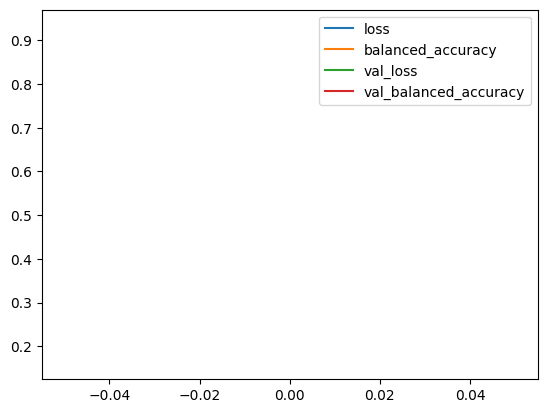

In [ ]:
pd.DataFrame(train_history.history).plot()

### model.save doesn't work in this case
so we need to save the weights files and then we need to make the same model architecture and then load with the weights

In [ ]:
model.save_weights('sentiment_weights.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/Emotion/sentiment_weights.h5')

lets create a new model and then load the weights

In [ ]:
# max_len = 70
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense

# input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
# input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# # embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]


# embeddings = bert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 means pooler_output)
# out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
# out = Dense(128, activation='relu')(out)
# out = tf.keras.layers.Dropout(0.1)(out)
# out = Dense(32,activation = 'relu')(out)

# y = Dense(6,activation = 'sigmoid')(out)

# new_model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
# new_model.layers[2].trainable = True
# # for training bert our lr must be so small

# new_model.load_weights('sentiment_weights.h5')

### Prediction Part

In [ ]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

188/188 [==============================] - 38s 202ms/step


In [ ]:
predicted_raw[0]

array([0.98552334, 0.5764835 , 0.36958233, 0.0141484 , 0.56362367,
       0.07355694], dtype=float32)

In [ ]:
y_predicted = np.argmax(predicted_raw, axis = 1)

In [ ]:

data_test.Sentiment

10486    0
17320    0
10848    2
16195    4
2093     4
        ..
17241    4
8642     1
19775    2
5733     0
1376     1
Name: Sentiment, Length: 6000, dtype: int8

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(data_test.Sentiment, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       813
           1       0.90      0.88      0.89       712
           2       0.97      0.93      0.95      2028
           3       0.80      0.91      0.86       492
           4       0.96      0.96      0.96      1739
           5       0.78      0.89      0.83       216

    accuracy                           0.93      6000
   macro avg       0.89      0.92      0.90      6000
weighted avg       0.93      0.93      0.93      6000



### for prediction lets

In [ ]:
texts = input(str('input the text'))

x_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100
validation

input the texti am the best
1/1 [==============================] - 0s 213ms/step


array([[19.727793, 12.051724, 93.879074, 21.30526 , 25.862995,  6.118267]],
      dtype=float32)

In [ ]:
for key , value in zip(encoded_dict.keys(),validation[0]):
    print(key,value)

anger 19.727793
fear 12.051724
joy 93.879074
love 21.30526
sadness 25.862995
surprise 6.118267


# For Backend

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.2 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer,TFBertModel
import shutil
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel, BertConfig,TFDistilBertModel,DistilBertTokenizer,DistilBertConfig
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
max_len=70
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

bert = TFBertModel.from_pretrained('bert-base-cased')
tokenizer.save_pretrained('bert-tokenizer')
bert.save_pretrained('bert-model')
shutil.make_archive('bert-model','zip','bert-model')
shutil.make_archive('bert-tokenizer', 'zip', 'bert-tokenizer')
dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')



input_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

embeddings = bert(input_ids,attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = tf.keras.layers.Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = tf.keras.layers.Dense(32,activation = 'relu')(out)

y = tf.keras.layers.Dense(6,activation = 'sigmoid')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
path = '/content/drive/MyDrive/Emotion/sentiment_weights.h5'
model.load_weights(f'{path}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def the_machine(texts,model):
  x_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
  validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100
  validation
  encoded_dict  = {'anger':0,'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5}
  b=dict()
  for key , value in zip(encoded_dict.keys(),validation[0]):
    b[key]=value
  return max(b, key=b.get)

In [ ]:
the_machine('nope',model)

1/1 [==============================] - 0s 78ms/step


'anger'

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 70,                                            